### Packages

In [ ]:
%reset -f

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json


### Single dot area

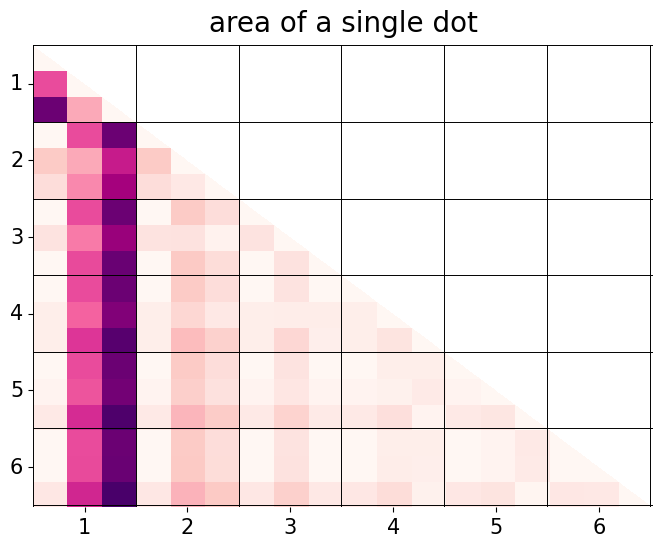

In [71]:
# ~~~~~~~~~~~~~ Importing data from param.json
cwd = os.getcwd() # get current working directory
parent_dir = os.path.dirname(os.path.dirname(cwd)) # Get the parent directory
param_path = os.path.join(parent_dir, 'experiment', 'stimuli', 'visual', 'param.json') # specify the paramter's path
with open(param_path) as f: # open json file
    param = json.load(f)
globals().update(param) # create the param for variables
# ~~~~~~~~~~~~~ Importing data from param.json ~~~~~~~~~~~~~



# ~~~~~~~~~~~~~ Vector creation
# Numeoristy vector 1260 * 1
num_vector = [i for i in numerosity for _ in range(total_n_trials)] 

# radius vector for each numerosity (70 trials * 3 condition = 210 * 1)
radius_vector = []
for i in numerosity: # Loop over the keys '1' to '6' 
    num_key = str(i)  # Convert loop index to string to match your dictionary keys
    x = np.concatenate((     # Concatenate the lists for the current key
        [singledotsize_cont_radius_px[num_key] for _ in range(n_trials)], # singledot controlled 
        [totaldotsize_cont_radius_px[num_key] for _ in range(n_trials)], # totaldot controlled 
        [circumference_cont_radius_px[num_key] for _ in range(n_trials)] # circumference controlled 
    ), axis=0)
    radius_vector.append(x)
radius_vector = np.concatenate(radius_vector, axis=0)

# generate 3 vectors using radius info (1. signle dot area, 2. total dot area, 3. total circumference)
singledot_area_vector = np.pi * np.square(radius_vector) # Compute the area for each radius
totaldot_area_vector = singledot_area_vector * num_vector  # Compute the totaldot area for each radius
total_circumference_vector = 2 * np.pi * radius_vector  # Compute the totaldot area for each radius
# ~~~~~~~~~~~~~ Vector creation ~~~~~~~~~~~~~



# ~~~~~~~~~~~~~~~~ RDM computation 
n = len(num_vector)
RDM = np.zeros((n, n))

for i in range(n): # Compute the Euclidean distance between each pair of numerosities
    for j in range(n):
        RDM[i, j] = np.abs(singledot_area_vector[i] - singledot_area_vector[j])
RDM = RDM / np.max(RDM) # Normalize the RDM
np.fill_diagonal(RDM, np.nan)  # Remove diagonal elements
# ~~~~~~~~~~~~~~~~ RDM computation ~~~~~~~~~~~~~~~~



# ~~~~~~~~~~~~~~~~ RDM visualization
# paramters
mask = np.triu(np.ones_like(RDM, dtype=bool), k=1)  # Create a mask to show only the lower triangle (or upper triangle if desired), # k=1 means keep the lower triangle, excluding the diagonal
ticks_positions = np.arange((n/6) /2, n, 209).tolist() # Positions in the heatmap corresponding from 1 to 6
ticks_labels = list(range(1,7)) # Labels for the ranges
blackline_positions = np.arange(0, n, 209).tolist()

rsa_image_dict = os.path.join(cwd, 'RDM') # specify the directory for stroing images
os.makedirs(rsa_image_dict, exist_ok=True)
image_name = 'rdm_area_single.png'
image_path = os.path.join(rsa_image_dict, image_name)

# plot and save the figure
plt.figure(figsize=(8, 6))
sns.heatmap(RDM, annot=False, cmap="RdPu", cbar=False, mask=mask)
plt.xticks(ticks=ticks_positions, labels=ticks_labels, rotation=0, fontsize=15)
plt.yticks(ticks=ticks_positions, labels=ticks_labels, fontsize=15)
# Draw horizontal black lines
for _ in blackline_positions:
    plt.axhline(_, color='black', linewidth=0.7)  # You can adjust linewidth as needed
    plt.axvline(_, color='black', linewidth=0.7)  # You can adjust linewidth as needed
plt.title('area of a single dot', fontsize=20, pad=10)
plt.savefig(image_path, format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()
# ~~~~~~~~~~~~~~~~ RDM visualization ~~~~~~~~~~~~~~~~

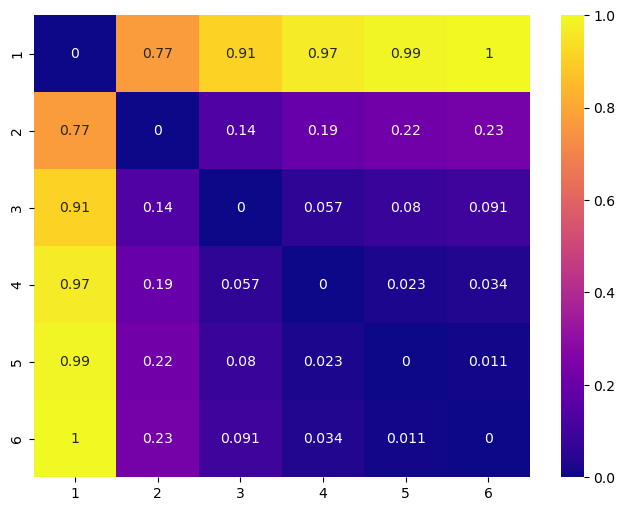

In [23]:
# Define the range of numerosities
numerosities = [i for i in range(1, 7) for _ in range(210)]
single_dot_area = [90, 22, 10, 5, 3, 2]

# Initialize an empty RDM matrix
n = len(numerosities)
RDM = np.zeros((n, n))

# Compute the Euclidean distance between each pair of numerosities
for i in range(n):
    for j in range(n):
        RDM[i, j] = np.abs(single_dot_area[i] - single_dot_area[j])

# Optional: Normalize the RDM
RDM = RDM / np.max(RDM)

# Visualize the RDM using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(RDM, annot=True, cmap="plasma", xticklabels=numerosities, yticklabels=numerosities)
plt.savefig('/Users/muku/Desktop/RDM_singledotarea_circumcont.png', format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()